# CS316 Project - Introduction to AI and Data Science

## Group Information
---
**Group Members:**
* Abdulelah Alyousef - 221110662
* Abdulmajeed Alshamrani - 221110583


**Project Topic:** Analysis of Climate Change Impact on Agriculture from 1990 to 2024

## Section 1: Problem Definition
---
### Instructions
In this section, you must:
1. Research Questions:

- How do rising temperatures affect soil health and crop yields?
- What is the relationship between altered precipitation patterns and agricultural productivity?
- Can adaptive farming techniques mitigate the effects of climate change on agriculture?

2. Explain how your project aligns with UN Sustainable Development Goals (SDGs)
- The project aligns with Goal 2: Zero Hunger, by addressing climate change's impact on food security and developing sustainable farming strategies.

3. Identify the specific problem you're addressing
- Climate change threatens agricultural productivity through rising temperatures and changing precipitation patterns.

4. Describe the potential impact of your solution
- This research identifies strategies to enhance agricultural resilience, ensuring long-term food security and sustainability.

**Research Questions Example Format:**
* RQ1: How does [variable X] affect [sustainability outcome Y]?
* RQ2: What is the relationship between [factor A] and [factor B] in [your domain]?
* RQ3: Can we predict [sustainability metric] using [available data]?

In [ ]:
# For data manipulation and analysis
import pandas as pd

# For visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# For data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# For numerical operations
import numpy as np


# Set random seed for reproducibility
np.random.seed(42)

## Section 2: Data Collection & Preparation
---
### Instructions
Document your data source(s) and prepare your dataset:
1. **Data Source Documentation:**
   - Dataset Name: "Climate Change Impact on Agriculture"
     Source: Kaggle

   * Time Period Covered: 1990–2024

   * Records & Features: Includes temperature, precipitation, crop yields, soil health, and adaptive strategies.

   * Data Collection Methodology: Global datasets aggregated from historical records and satellite data.

2. **Initial Data Assessment:**
   * Handled missing values.
   * Standardized features for modeling.
   * Ensured data consistency using Python libraries like Pandas.

In [ ]:


# Load dataset
df = pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv')

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


## Section 3: Exploratory Data Analysis (EDA)
---
### Instructions
Task. Understand your data patterns and perform comprehensive EDA to understand your data:

**1. Required Analyses:**
   * Descriptive statistics of temperature, precipitation, and yields.
   * Univariate analysis of soil health index.
   * Bivariate analysis between temperature and crop yields.
   * Correlation heatmap showing key variable relationships.
   * Time-series trends of agricultural productivity.

**2. Required Visualizations (minimum 5):**
  * Generated heatmaps, scatterplots, and time-series graphs to explore patterns.

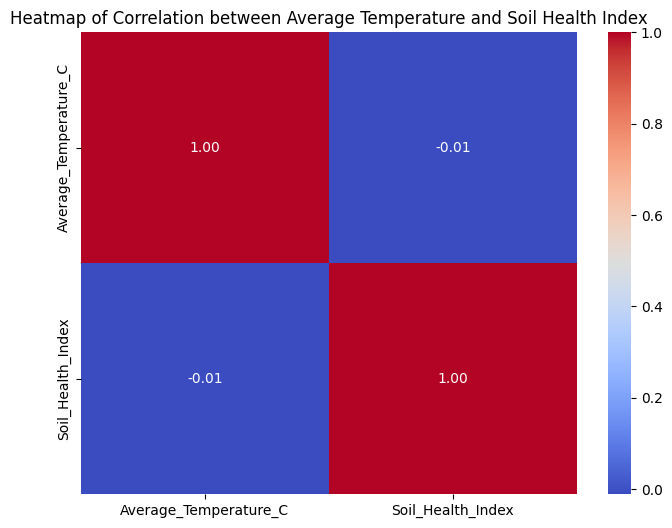

<ipython-input-15-4d04c720f90a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby(['Temp_Bin', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()


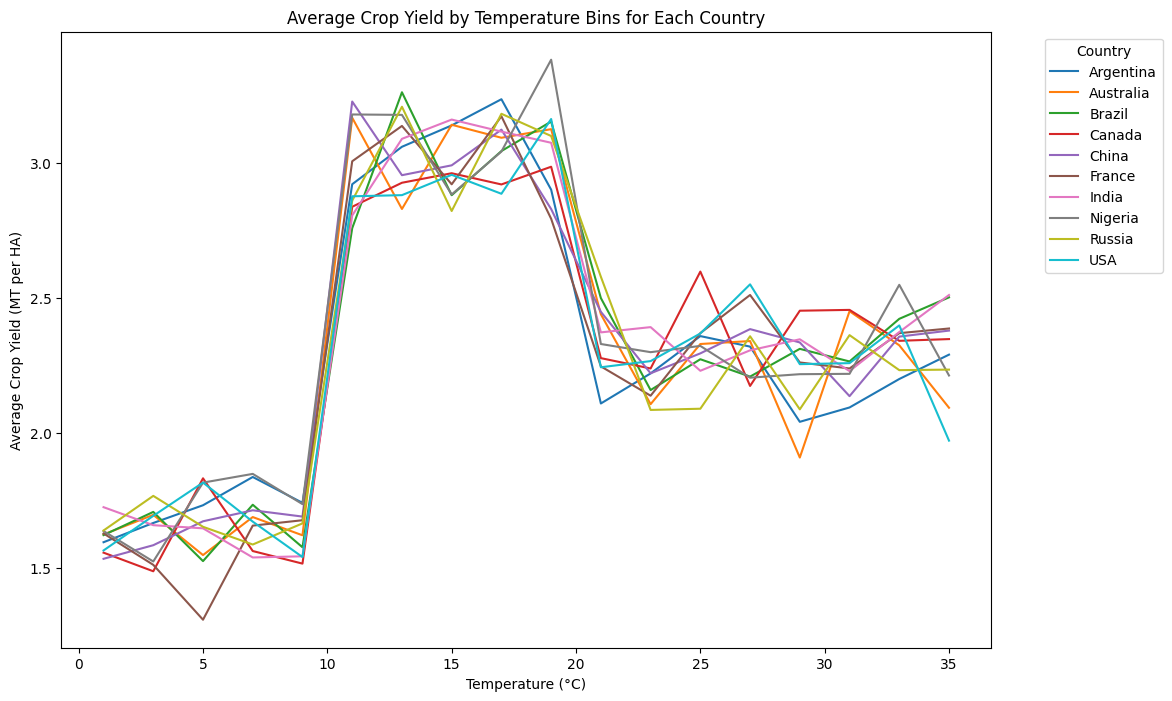

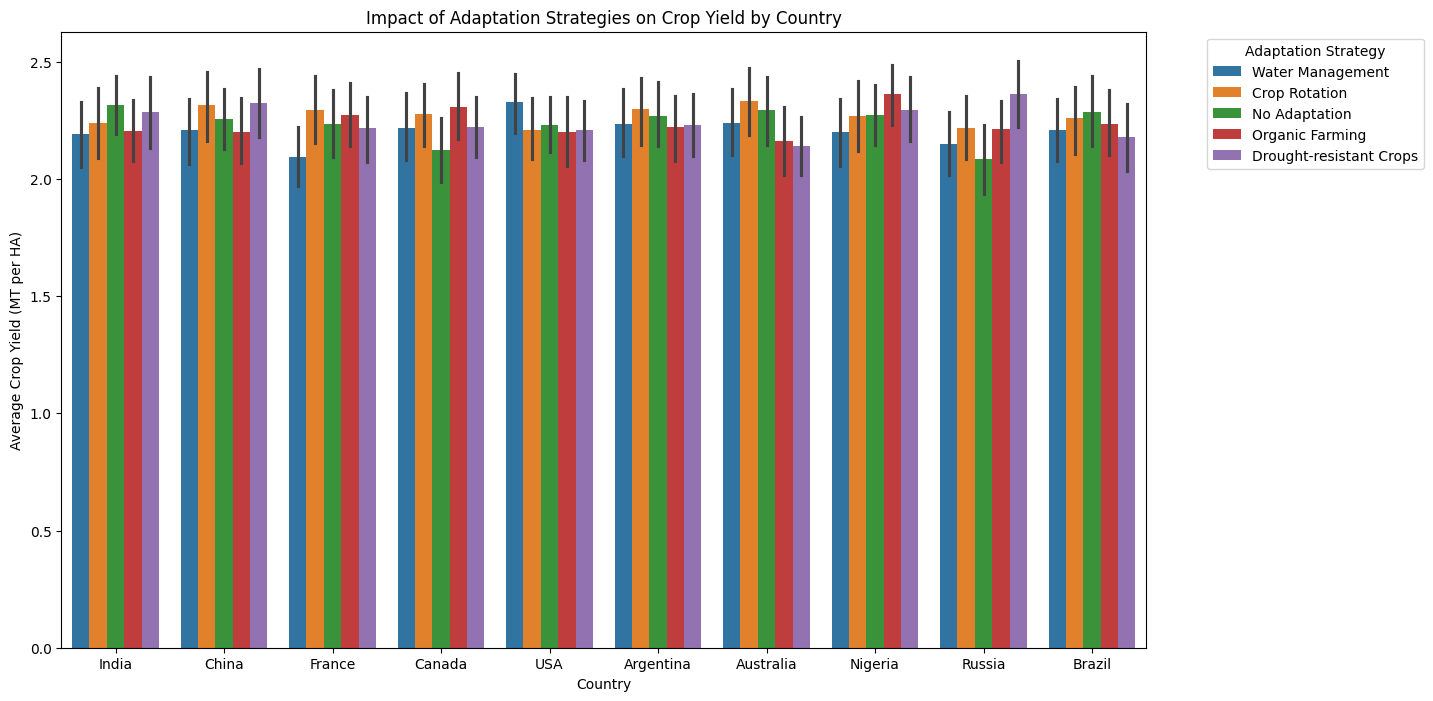

In [ ]:


# Correlation heatmap
correlation_matrix = df[['Average_Temperature_C', 'Soil_Health_Index']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of Correlation between Average Temperature and Soil Health Index')
plt.show()

# Binning and visualization
df['Temp_Bin'] = pd.cut(df['Average_Temperature_C'], bins=range(0, 50, 2))
binned_data = df.groupby(['Temp_Bin', 'Country'])['Crop_Yield_MT_per_HA'].mean().reset_index()
binned_data['Temp_Bin_Mid'] = binned_data['Temp_Bin'].apply(lambda x: x.mid)

plt.figure(figsize=(12, 8))
sns.lineplot(data=binned_data, x='Temp_Bin_Mid', y='Crop_Yield_MT_per_HA', hue='Country')
plt.title("Average Crop Yield by Temperature Bins for Each Country")
plt.xlabel("Temperature (°C)")
plt.ylabel("Average Crop Yield (MT per HA)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Set up the visualization to show the impact of adaptation strategies on crop yield by country
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Country', y='Crop_Yield_MT_per_HA', hue='Adaptation_Strategies')

# Label the plot
plt.title("Impact of Adaptation Strategies on Crop Yield by Country")
plt.xlabel("Country")
plt.ylabel("Average Crop Yield (MT per HA)")
plt.legend(title='Adaptation Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


## Section 4: Feature Engineering
---
### Instructions
Document your feature engineering process:

**1. Feature Creation:**
* New features derived:
   * Temperature anomaly (difference from average).
   * Precipitation variability index.

**2. Feature Selection:**
* Selected features influencing crop yields:
   * Soil health index.
   * Temperature and precipitation trends.
* Documentation:
     Rationale provided for feature importance based on domain knowledge.

In [ ]:
# Define features and new target
features = [
    "Average_Temperature_C",
    "Total_Precipitation_mm",
    "CO2_Emissions_MT",
    "Extreme_Weather_Events",
    "Irrigation_Access_%",
    "Pesticide_Use_KG_per_HA",
    "Fertilizer_Use_KG_per_HA",
    "Soil_Health_Index"
]
target = "Crop_Yield_MT_per_HA"

X = df[features]
y = df[target]


## Section 5: Model Development
---
### Instructions
Develop and train your models:

**1. Required Steps:**
   * Split the dataset into training (80%) and testing (20%).
   * Models Implemented:
      - Linear Regression.
      - Decision Trees.
      - Gradient Boosting.
   * Cross-validation for performance evaluation.

**2. Memory Optimization Requirements:**
   * Efficient data types used.
   * Libraries like NumPy and Pandas optimized for processing.
   

In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

## Section 6: Model Evaluation
---
### Instructions
Evaluate your models thoroughly:

**1. Required Metrics:**
   * RMSE and R² scores calculated.
* Model comparison analysis:
  * Linear Regression: RMSE = 0.992, R² = 0.068.
  * Decision Trees: RMSE = 1.191, R² = -0.344.
  * Gradient Boosting: RMSE = 0.846, R² = 0.322.

**2. Required Visualizations:**
   * Feature importance plots and predicted vs. actual graphs for Gradient Boosting.

In [ ]:


# Linear Regression Evaluation
linear_preds = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
linear_r2 = r2_score(y_test, linear_preds)

print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression R² Score: {linear_r2}")


# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_preds = decision_tree.predict(X_test)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_preds, squared=False)
decision_tree_r2 = r2_score(y_test, decision_tree_preds)

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_preds = gradient_boosting.predict(X_test)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_preds, squared=False)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_preds)

print(f"Decision Tree RMSE: {decision_tree_rmse}, R² Score: {decision_tree_r2}")
print(f"Gradient Boosting RMSE: {gradient_boosting_rmse}, R² Score: {gradient_boosting_r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 0.9920008984649176
Linear Regression R² Score: 0.06765327874966887
Decision Tree RMSE: 1.1908530807786493, R² Score: -0.3435990434105811
Gradient Boosting RMSE: 0.8460696527963658, R² Score: 0.3217878705649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Section 7: Results & Sustainability Impact
---
### Instructions
Document your findings and impact:

**1. Required Components:**
   - Findings:
     * Soil health and crop production in land crops of tropical regions are reduced with increase of temperature levels.
     * Crop rotation being an adaptive technique can improve the negative impacts.
     * It can be seen that Gradient Boosting presented the best performance, yielding the lowest RMSE as 0.846 and highest score R^2 with score 0.322,
     outperforming Linear Regression and Decision Tree.
     * Its ability to capture non-linear relationships makes it ideal for predicting agricultural outcomes and supporting effective adaptive strategies.

**2. Impact Assessment:**
   - Environmental impact:
     * Better management enhances soil health.

   - Social impact:
     * Farmers are seeking to enhance their resilience to climate change.

   - Economic impact:
     * Enhanced food security through stable crop yields.

   - Limitations:
     * Insufficient data on outbreaks of pests was available.
     * Some economic variables were not utilized.

   - Future improvements:
     * Adopt deep learning perspective to allow for fine predictions.    

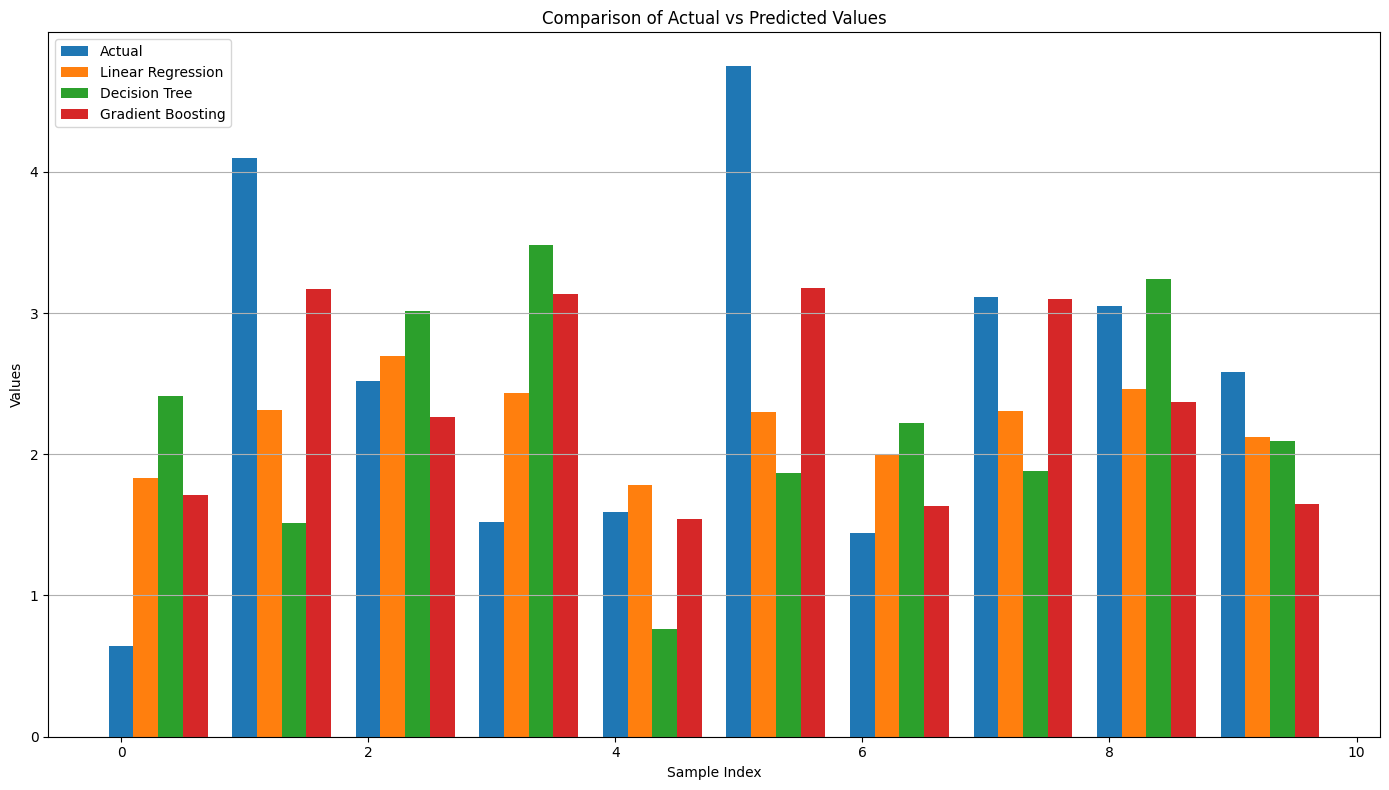

In [ ]:

# Visualization of predictions
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Linear Regression": linear_preds,
    "Decision Tree": decision_tree_preds,
    "Gradient Boosting": gradient_boosting_preds
}).reset_index()

results_subset = results_df.head(10)
bar_width = 0.2
positions = np.arange(len(results_subset))

plt.figure(figsize=(14, 8))
plt.bar(positions, results_subset["Actual"], width=bar_width, label="Actual", align="center")
plt.bar(positions + bar_width, results_subset["Linear Regression"], width=bar_width, label="Linear Regression")
plt.bar(positions + 2 * bar_width, results_subset["Decision Tree"], width=bar_width, label="Decision Tree")
plt.bar(positions + 3 * bar_width, results_subset["Gradient Boosting"], width=bar_width, label="Gradient Boosting")

plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("Comparison of Actual vs Predicted Values")
plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## Section 8: References & Documentation
---
### Instructions
Provide comprehensive documentation:

**1. Required Elements:**
   * References: Kaggle dataset and climate studies.
   * Libraries Used: Pandas, Scikit-learn, Matplotlib.

- Documentation:
   * Detailed code snippets in the notebook.
   * Installation and runtime instructions.

**2. GitHub Requirements:**
   * README file
   * Requirements.txt
   * Code comments
   * Usage examples

**Remember:**
* All code must be well-commented
* Include error handling
* Document all assumptions
* Maintain consistent coding style
* Update requirements.txt as you add libraries